# Schrodinger Solver

In [1]:
%matplotlib inline
import sys
ver=sys.version_info.major
if ver==2:
    from utils2 import *
elif ver==3:
    from utils3 import *
else:
    print("Python version not recognized. Python 2.5 or greater required.")
import numpy as np

## Note about units
We will be using atomic units throughout.

In [2]:
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

## Particle in Morse Well


*******************************************************************************
                           Schrodinger Solver Output                           
                        Matthew Srnec and Shiv Upadhyay                        
*******************************************************************************
                           Particle in a Morse well                            

		Input:
                             Force Constant : 0.1                              
                                  Depth : 2.0                                  

		8 lowest Bound States:
                              E(0)=-1.97619909481                              
                              E(1)=-1.95908741862                              
                              E(2)=-1.64613153223                              
                              E(3)=-1.49702104936                              
                              E(4)=-1.2348510394                               
   

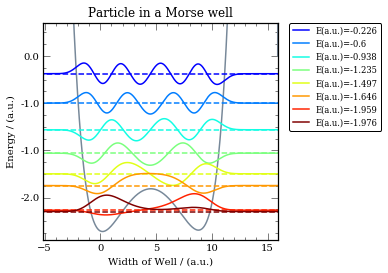

462.015256878 462.015256878
8449.80893259 8911.82418947
4025.98303751 12937.807227
7078.59026897 20016.397496
8019.92806689 28036.3255628
9128.22485254 37164.5504154
10082.0183299 47246.5687453
9184.14190278 56430.710648
1774.82644189 58205.5370899
7444.92640913 65650.4634991


In [7]:
########
# PARTICLE IN A MORSE WELL OF DEPTH (D) WITH A FORCE CONSTANT (omega)
########
Case=6
########
# INPUT
########
# set force constant and depth of morse well
omega=0.1 # this value must be between 0.05 and 1.4
D=2.0 # this value must be between 2 and 15
########
# CODE
########
# create the potential from morse potential function
xvec,h,U=morse_potential(omega,D,steps)
# create Laplacian via 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)+\
    np.diag(np.ones(steps-1),-1))/(float)(h**2)
# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j]=np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U
Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=diagonalize_hamiltonian(Hamiltonian)
# determine number of energy levels to plot (n)
n=0
while E[n]<0:
    n+=1
# print output
output(Case,['Force Constant','Depth'],[omega,D],E,n)
# create plot
finite_well_plot(E,V,xvec,steps,n,Case,U)
for i in range(10):
    print (E[i+1]-E[i])*27000,(E[i+1]-E[0])*27*1e3
